<a href="https://colab.research.google.com/github/Veranzi/data-manipulation/blob/main/SentimentAnalyisModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression ,Ridge ,Lasso
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,GradientBoostingClassifier ,ExtraTreesClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC ,LinearSVC
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.utils import resample
from tqdm import tqdm

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/datasets/models/tweets.csv')

In [5]:
df

,Unnamed: 0,Unnamed: 0.1,message,label
0,0,106,just had a real good moment. i missssssssss hi...,0
1,1,217,is reading manga http://plurk.com/p/mzp1e,0
2,2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...,...
4623,10309,802309,No Depression by G Herbo is my mood from now o...,1
4624,10310,802310,What do you do when depression succumbs the br...,1
4625,10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
4626,10312,802312,dont mistake a bad day with depression! everyo...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4628 non-null   int64 
 1   Unnamed: 0.1  4628 non-null   int64 
 2   message       4628 non-null   object
 3   label         4628 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 144.8+ KB


In [7]:
print('columns name : ',df.columns)

columns name :  Index(['Unnamed: 0', 'Unnamed: 0.1', 'message', 'label'], dtype='object')


In [8]:
df.rename({'label (depression result)':'label','message':'text'},axis=1,inplace=True)

In [9]:
print('columns name : ',df.columns)

columns name :  Index(['Unnamed: 0', 'Unnamed: 0.1', 'text', 'label'], dtype='object')


In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Unnamed: 0.1,text,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
4623,802309,No Depression by G Herbo is my mood from now o...,1
4624,802310,What do you do when depression succumbs the br...,1
4625,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
4626,802312,dont mistake a bad day with depression! everyo...,1


In [11]:
df.drop('Unnamed: 0.1',axis=1,inplace=True)
df

,text,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
4623,No Depression by G Herbo is my mood from now o...,1
4624,What do you do when depression succumbs the br...,1
4625,Ketamine Nasal Spray Shows Promise Against Dep...,1
4626,dont mistake a bad day with depression! everyo...,1


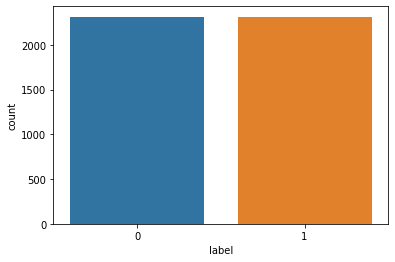

In [12]:
sns.countplot(df.label)
plt.show()

In [13]:
df.label.value_counts()

0    2314
1    2314
Name: label, dtype: int64

In [14]:
def Create_pipe(models,df,text_column,label_column):
    # SPLIT DATA TO TRAIN & TEST
    train ,test =train_test_split(df,test_size=.3,random_state=42)
    acc = []
    for model in tqdm(models):
        try:
            pipe_model = [('tf_idf',TfidfVectorizer()),
            ('model',model)
            ]
            my_pipe = Pipeline(pipe_model)
            my_pipe.fit(train[text_column],train[label_column])
            my_pipe.score(test[text_column],test[label_column])
            acc.append([my_pipe.score(test[text_column],test[label_column]),my_pipe['model']])
        except:
            print('can\'t',model)
    return acc

In [15]:
models = [
          LogisticRegression(),
          SVC(),
        RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(),
    LinearSVC(random_state=42),
    Ridge(random_state=42),
    Lasso(random_state=42),
    #CatBoostClassifier(random_state=42,verbose=False),
    ExtraTreesClassifier(random_state=42),
    XGBClassifier()
    
         ]
data = Create_pipe(models,df,'text','label')
pd.DataFrame(data,columns=['acc','name']).sort_values(by='acc',ascending=False)

100%|██████████| 11/11 [00:13<00:00,  1.22s/it]


,acc,name
4,0.994240,([DecisionTreeRegressor(criterion='friedman_ms...
10,0.993521,XGBClassifier()
3,0.991361,"(DecisionTreeClassifier(max_depth=1, random_st..."
6,0.989921,LinearSVC(random_state=42)
1,0.988481,SVC()
0,0.985601,LogisticRegression()
2,0.980562,"(DecisionTreeClassifier(max_features='auto', r..."
9,0.956803,"(ExtraTreeClassifier(random_state=1608637542),..."
5,0.779698,KNeighborsClassifier()
7,0.502300,Ridge(random_state=42)


In [16]:
def get_n_grams(text,low_n,high_n,top_number):
    '''
    Function to Make a tuple of words and the count of each word repeated 
    in the List
    
    input ->  list of text or pandas series, n_gram_range (low ,high) , 
              number of top word 
    
    '''
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

Cleaning the dataset

In [17]:
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'].head()

0    just had a real good moment i missssssssss him...
1                 is reading manga  httpplurkcompmzp1e
2    comeagainjen httptwitpiccom2y2lx  httpwwwyoutu...
3    lapcat Need to send em to my accountant tomorr...
4             ADD ME ON MYSPACE  myspacecomLookThunder
Name: text, dtype: object

In [23]:
model = [
          LogisticRegression(),
          SVC(),
        RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(),
    LinearSVC(random_state=42),
    Ridge(random_state=42),
    Lasso(random_state=42),
    #CatBoostClassifier(random_state=42,verbose=False),
    ExtraTreesClassifier(random_state=42),
    XGBClassifier()
    
         ]
data = Create_pipe(models,df,'text','label')
pd.DataFrame(data,columns=['acc','name']).sort_values(by='acc',ascending=False)

100%|██████████| 11/11 [00:13<00:00,  1.19s/it]


,acc,name
4,0.984881,([DecisionTreeRegressor(criterion='friedman_ms...
6,0.982001,LinearSVC(random_state=42)
3,0.979842,"(DecisionTreeClassifier(max_depth=1, random_st..."
10,0.977682,XGBClassifier()
1,0.976962,SVC()
0,0.966883,LogisticRegression()
2,0.966883,"(DecisionTreeClassifier(max_features='auto', r..."
9,0.935205,"(ExtraTreeClassifier(random_state=1608637542),..."
5,0.770338,KNeighborsClassifier()
7,0.390403,Ridge(random_state=42)


In [24]:
import pickle

In [25]:
pickle.dump(model,open('Textmodel.pkl','wb'))

In [27]:
#model.save('Textmodel.h5')

In [28]:
with open('Textmodel.bin','wb') as f_out:
  pickle.dump(model,f_out)

In [31]:
f_out = open('Textmodel.pkl','wb')
pickle.dump(model,f_out)
f_out.close()

In [35]:
with open('Textmodel.bin','rb') as f_in:
   model = pickle.load(f_in)